# **Assignment 3:- Case Study:- Customer Churn Prediction**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
# Load dataset to in a variable
df = pd.read_csv('/content/drive/MyDrive/BSE - Deep learning/Churn_Modelling.csv')

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#Drop unnecessary column
df = df.drop(columns=['RowNumber'],axis=1)

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Check null values in a dataframe
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#check information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.loc[:,('CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary')].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
df.loc[df['Gender'] == 'Male', df.columns[2:-1]].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000
mean,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931
std,96.549706,10.396780,2.876726,62639.251138,0.562834,0.454771,0.499401,57628.130354
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50906.650000
50%,651.000000,37.000000,5.000000,98064.970000,1.000000,1.000000,1.000000,98060.510000
75%,718.000000,43.000000,8.000000,127900.030000,2.000000,1.000000,1.000000,149503.540000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199953.330000


In [ ]:
df.loc[df['Gender'] == 'Female', df.columns[2:-1]].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382
std,96.787350,10.588588,2.910252,62102.467293,0.603254,0.457156,0.500047,57371.034092
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.750000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51224.485000
50%,652.000000,38.000000,5.000000,96147.550000,1.000000,1.000000,1.000000,101905.340000
75%,717.000000,45.000000,7.000000,127141.785000,2.000000,1.000000,1.000000,148963.120000
max,850.000000,85.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000


In [ ]:
df.shape

(10000, 14)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
print('Male and Female occurance  in the bank (in the term of percentage)')
(df['Gender'].value_counts()/ df['Gender'].value_counts().sum()) *100

Male and Female occurance  in the bank (in the term of percentage)


Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [ ]:
print('Customers count by geography')
df.groupby(['Gender','Geography'])['Geography'].agg(['count']).sort_values(by ="Gender",ascending=False)

Customers count by geography


count
Gender Geography       
Male   France      2753
       Germany     1316
       Spain       1388
Female France      2261
       Germany     1193
       Spain       1089

In [ ]:
print('Customer ratio in bank from different countries:-\n')
print((df.groupby(['Geography'])['Geography'].count()/df.groupby(['Geography'])['Geography'].count().sum()) * 100)

Customer ratio in bank from different countries:-

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64


In [ ]:
print('Male and female customers ratio in bank from different countries:-\n')
print((df.groupby(['Gender','Geography'])['Geography'].count()/df.groupby(['Gender','Geography'])['Geography'].count().sum()) * 100)


Male and female customers ratio in bank from different countries:-

Gender  Geography
Female  France       22.61
        Germany      11.93
        Spain        10.89
Male    France       27.53
        Germany      13.16
        Spain        13.88
Name: Geography, dtype: float64


In [ ]:
print('Average age of male and female customers from different countries:- \n')
print(df.pivot_table(index=['Gender','Geography'],values='Age',aggfunc='median'))

Average age of male and female customers from different countries:- 

                  Age
Gender Geography     
Female France      37
       Germany     39
       Spain       38
Male   France      37
       Germany     38
       Spain       37


In [ ]:
print('Average balance of different countries')
print(df.groupby(['Geography'])['Balance'].agg(['median']))

Average balance of different countries
              median
Geography           
France      62153.50
Germany    119703.10
Spain       61710.44


In [ ]:
print('Average estimatd salary of different countries')
print(df.groupby(['Geography'])['EstimatedSalary'].agg(['median']))

Average estimatd salary of different countries
              median
Geography           
France      99132.31
Germany    102397.22
Spain       99984.86


In [ ]:
print('Average balance as well as estimated salary of male and female in different countries:-\n')
print(df.groupby(['Gender','Geography'])['Balance','EstimatedSalary'].agg(['median']).sort_values(by ="Gender",ascending=False))

Average balance as well as estimated salary of male and female in different countries:-

                     Balance EstimatedSalary
                      median          median
Gender Geography                            
Male   France      69413.440        99017.34
       Germany    120120.490        97892.70
       Spain       69857.005        95672.38
Female France      47536.400        99504.03
       Germany    118907.600       104617.99
       Spain           0.000       102889.34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
group_by_exited = df.groupby(by='Exited')
yes_exited = group_by_exited.get_group(1)
print('People who exited the bank by The Grography(In percentage term)\n')
(yes_exited.groupby(['Geography'])['Exited'].count()/yes_exited.groupby(['Geography'])['Exited'].count().sum()) * 100 

People who exited the bank by The Grography(In percentage term)



Geography
France     39.764359
Germany    39.960727
Spain      20.274914
Name: Exited, dtype: float64

In [ ]:
print('The bank exited (percentage) ratio by Gender in the different Geography wise  :--\n')
((yes_exited.groupby(['Gender','Geography'])['Exited'].count()/yes_exited.groupby(['Gender','Geography'])['Exited'].count().sum()) * 100)

The bank exited (percentage) ratio by Gender in the different Geography wise  :--



Gender  Geography
Female  France       22.582229
        Germany      21.993127
        Spain        11.340206
Male    France       17.182131
        Germany      17.967599
        Spain         8.934708
Name: Exited, dtype: float64

In [ ]:
print('\tTop 10 customers by Highest credit score\n')
df.loc[:,('CustomerId','Gender','Geography','CreditScore')].sort_values(by ="CreditScore",ascending=False)[:10]

	Top 10 customers by Highest credit score



,CustomerId,Gender,Geography,CreditScore
792,15707473,Female,Germany,850
4083,15672640,Female,Spain,850
4158,15771580,Female,France,850
4157,15719793,Male,Spain,850
7413,15604536,Female,Germany,850
4141,15790596,Male,Spain,850
7470,15602456,Female,Germany,850
4104,15676571,Male,France,850
4071,15732430,Female,Spain,850
7371,15624850,Male,France,850


In [ ]:
print('\tTop 10 customers by Lowest credit score\n')
df.loc[:,('CustomerId','Gender','Geography','CreditScore')].sort_values(by ="CreditScore",ascending=True)[:10]

	Top 10 customers by Lowest credit score



,CustomerId,Gender,Geography,CreditScore
8762,15765173,Female,France,350
8723,15803202,Male,France,350
1838,15758813,Male,Germany,350
9624,15668309,Female,France,350
1631,15685372,Male,Spain,350
2473,15679249,Female,Germany,351
1962,15692416,Female,Spain,358
1405,15612494,Female,France,359
1193,15779947,Female,Spain,363
2579,15597896,Male,Germany,365


In [ ]:
group_by_active = df.groupby(by='IsActiveMember')

In [ ]:
# Describe function where the customers is not a active member of the bank 
group_by_active.get_group(0).describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.0,4849.000000,4849.000000
mean,1.569082e+07,647.973603,37.997938,5.097340,77134.376863,1.524438,0.711074,0.0,100767.203854,0.268509
std,7.144191e+04,97.725193,8.943580,2.883465,62545.195018,0.592401,0.453310,0.0,57561.190241,0.443230
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.0,91.750000,0.000000
25%,1.563035e+07,581.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.0,51553.430000,0.000000
50%,1.569053e+07,650.000000,37.000000,5.000000,98263.460000,1.000000,1.000000,0.0,100686.110000,0.000000
75%,1.575210e+07,716.000000,43.000000,8.000000,128270.560000,2.000000,1.000000,0.0,149913.840000,1.000000
max,1.581563e+07,850.000000,84.000000,10.000000,222267.630000,4.000000,1.000000,0.0,199992.480000,1.000000


In [ ]:
# Describe function where the customers is a active member of the bank 
group_by_active.get_group(1).describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5.151000e+03,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.0,5151.000000,5151.000000
mean,1.569106e+07,652.934188,39.791497,4.933217,75875.422145,1.535624,0.700252,1.0,99452.965894,0.142691
std,7.240514e+04,95.580356,11.691969,2.898377,62257.859389,0.571357,0.458192,0.0,57461.026613,0.349791
min,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.0,11.580000,0.000000
25%,1.562701e+07,587.000000,32.000000,2.000000,0.000000,1.000000,0.000000,1.0,50768.785000,0.000000
50%,1.569115e+07,655.000000,37.000000,5.000000,96166.880000,2.000000,1.000000,1.0,99505.750000,0.000000
75%,1.575457e+07,719.000000,45.000000,7.000000,127033.240000,2.000000,1.000000,1.0,148648.760000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.0,199953.330000,1.000000


# **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(4)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


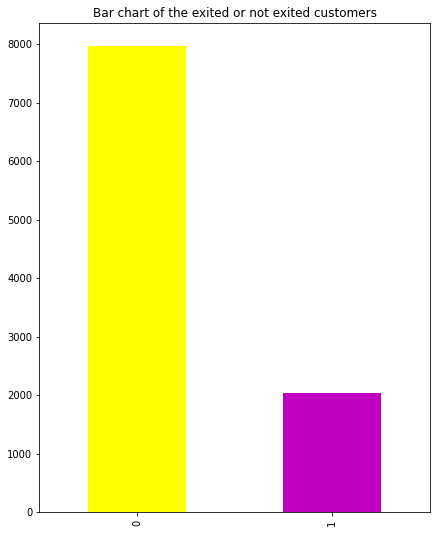

In [ ]:
plt.figure(figsize=(7,9))
plt.title('Bar chart of the exited or not exited customers')
df['Exited'].value_counts().plot(kind='bar',color=['Yellow','m'])
plt.show()


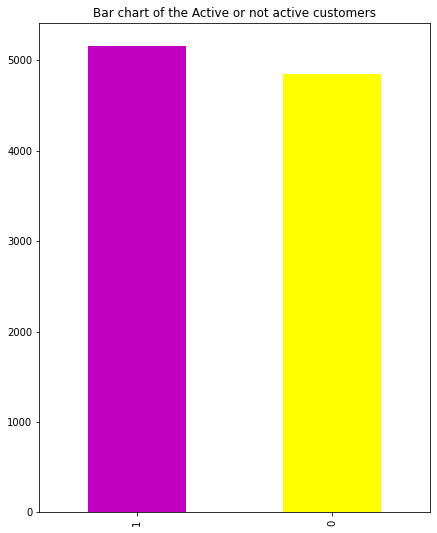

In [ ]:
plt.figure(figsize=(7,9))
plt.title('Bar chart of the Active or not active customers')
df['IsActiveMember'].value_counts().plot(kind='bar',color=['m','Yellow'])
plt.show()

In [ ]:
df_col = df.loc[:,('Geography','Gender','Age','Balance','EstimatedSalary')]

In [ ]:
corr_df = df.corr()
corr_df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

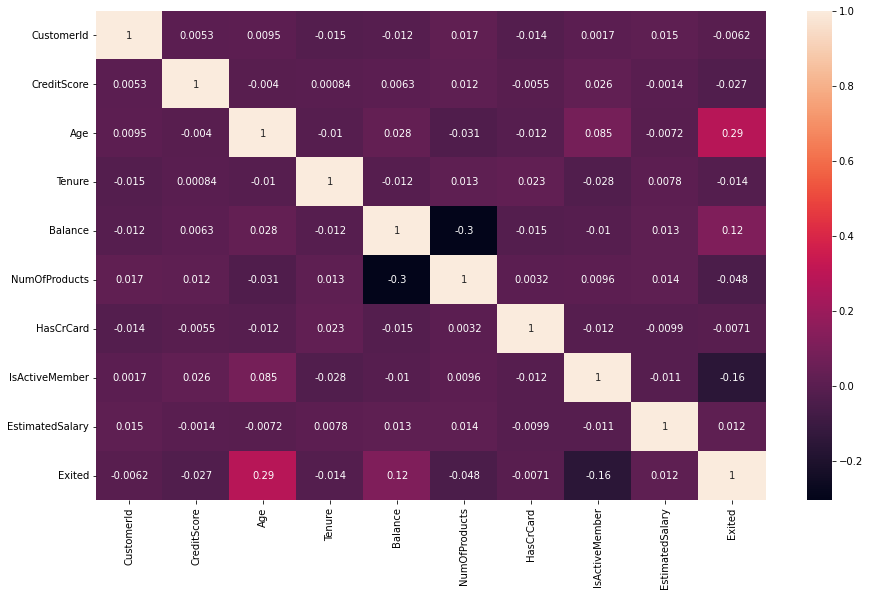

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(data= corr_df, annot=True)# 'annot= True' filles the R value in heatmap cells.
plt.show

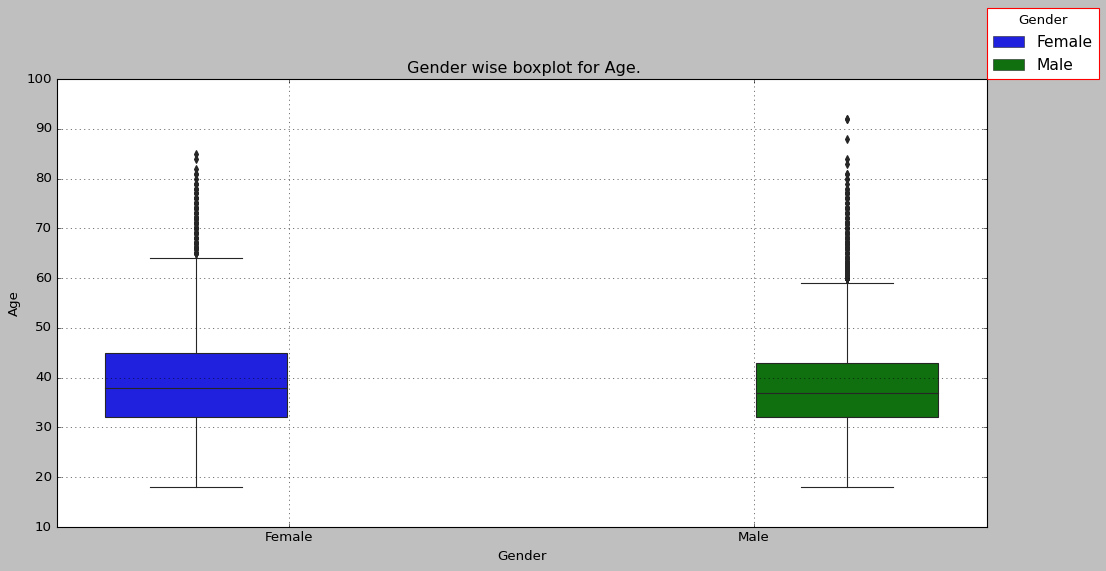

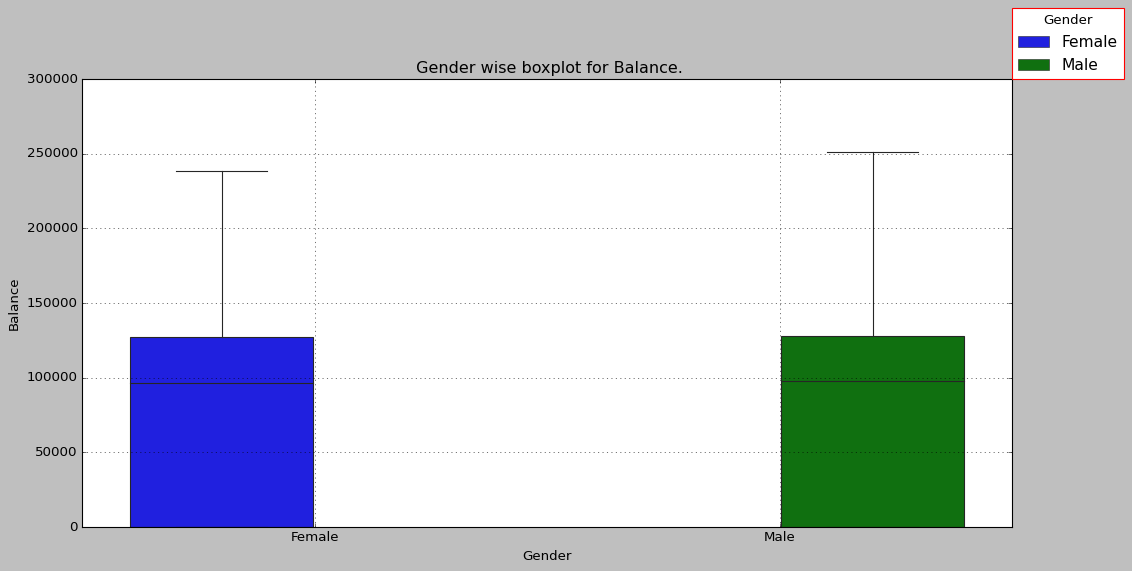

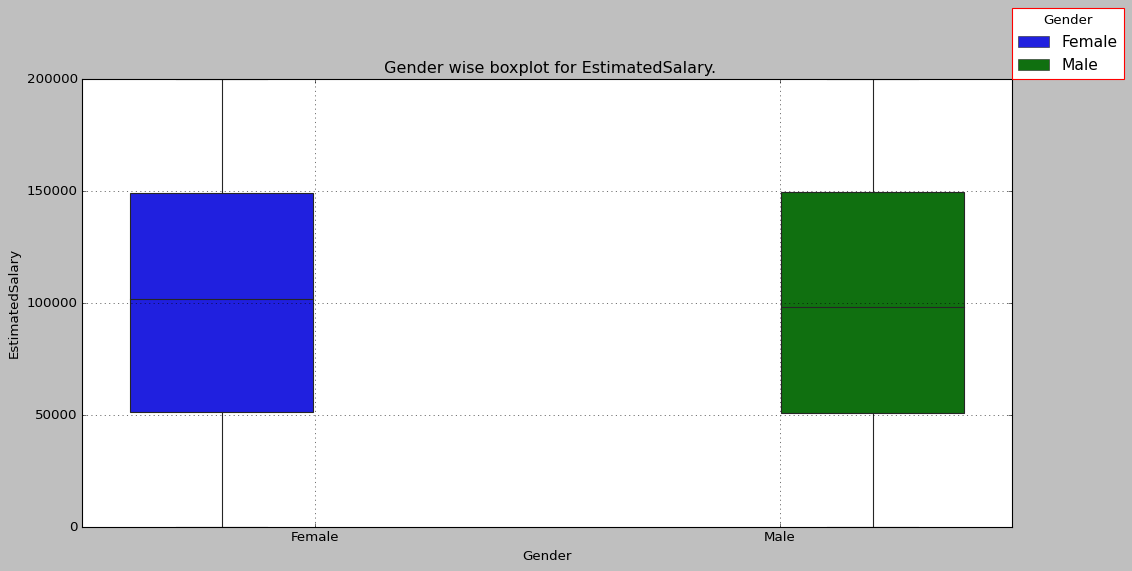

In [ ]:
for col in df_col.columns[2:]:
  plt.style.use('classic')
  plt.figure(figsize=(15,7))
  plt.title(f'\n Gender wise boxplot for {col}.')
  sns.boxplot(x='Gender',y=col,hue='Gender',data=df_col)
  plt.legend(loc=(1,1),edgecolor="red",title="Gender",fontsize = 14)
  plt.grid()
  plt.show()

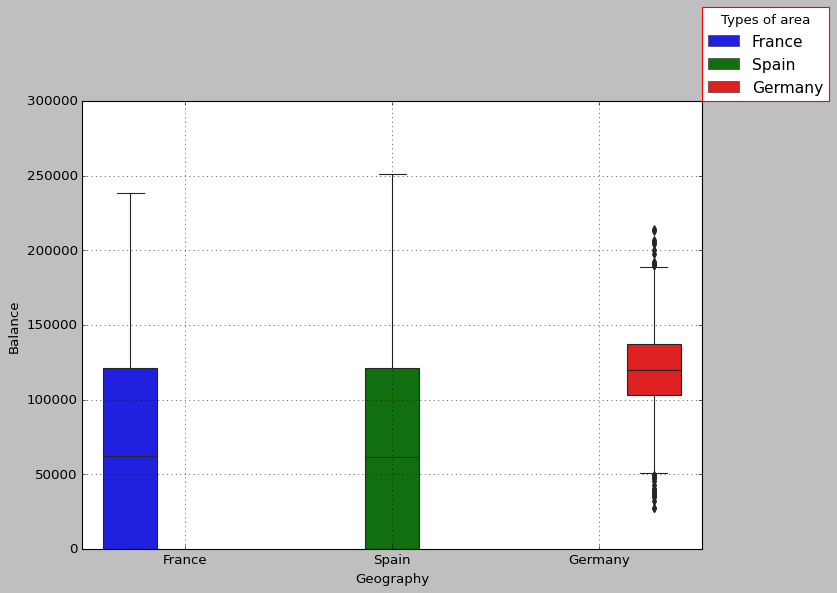

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Geography',y='Balance',hue='Geography',data=df)
plt.legend(loc=(1,1),edgecolor="red",title="Types of area",fontsize = 14)
plt.grid()
plt.show()



In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

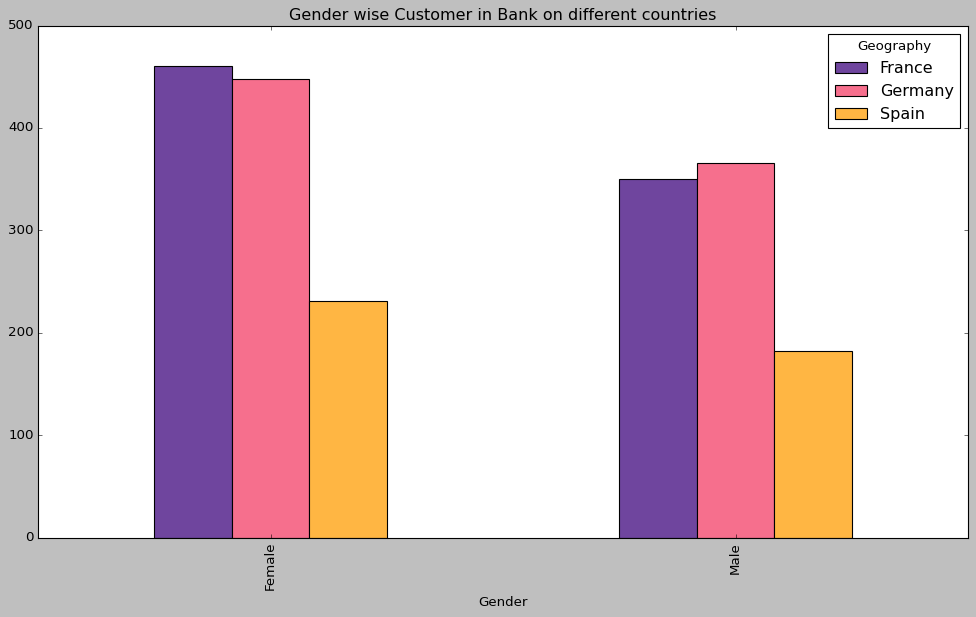

In [ ]:
dfv1 = yes_exited.groupby(['Gender','Geography'])['Gender'].size()
dfv1 = dfv1.unstack()
dfv1.plot(kind= 'bar',figsize=(15,8),title='Gender wise Customer in Bank on different countries',color = ['#6F459E','#F66F8D','#FFB643'])

In [ ]:
dfv1

Geography,France,Germany,Spain
Gender,,,
Female,460,448,231
Male,350,366,182


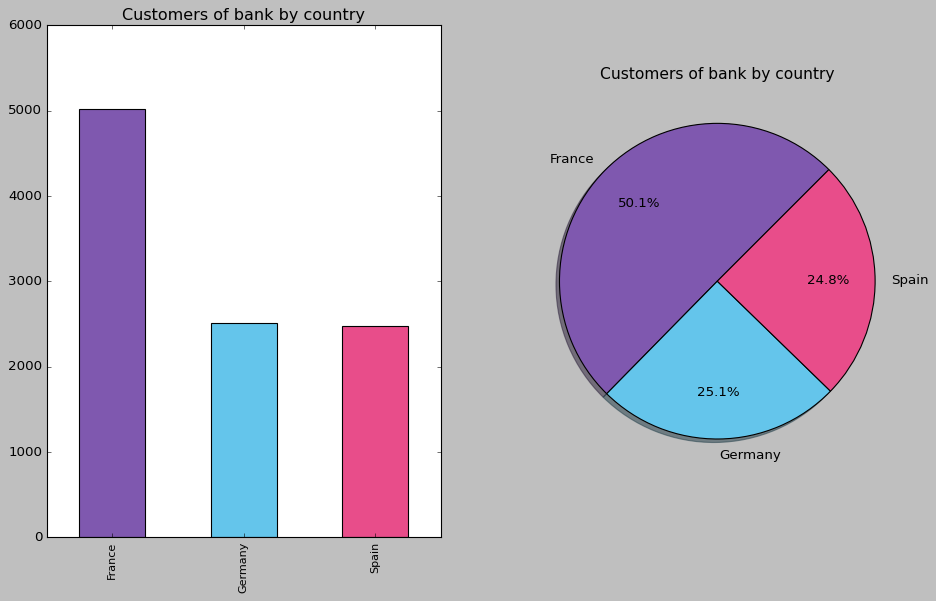

In [ ]:
count_population = df['Geography'].value_counts()
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plot = count_population.plot(kind='bar', title = "Customers of bank by country",color = ['#7F58AF','#64C5EB','#E84D8A','#6F459E','#F66F8D','#FFB643'])
plt.xticks(fontsize =10 , rotation=90)



plt.subplot( 1,2, 2)
colors = ['#7F58AF','#64C5EB','#E84D8A']
plot =plt.pie(list(df['Geography'].value_counts()),labels = list(df['Geography'].value_counts().keys()), autopct='%1.1f%%',pctdistance=0.700,startangle = 45,colors = colors,shadow=True)
plt.title("Customers of bank by country",fontsize = 14)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


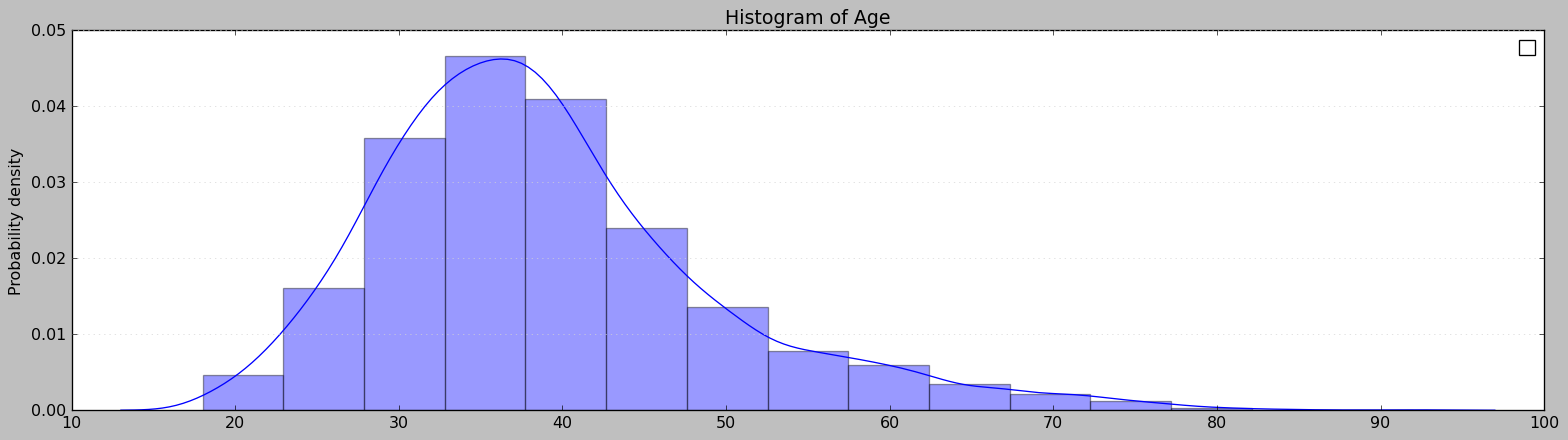

In [ ]:
heights = df[['Age']]
plt.figure(figsize=(20,5),dpi=95)
plt.title("Histogram of Age")
sns.distplot(heights,bins='sturges')
#plt.axvline(heights.mean(), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2)

plt.ylabel('Probability density')
plt.legend()
plt.grid(which='major',axis='y',color='lightgrey')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


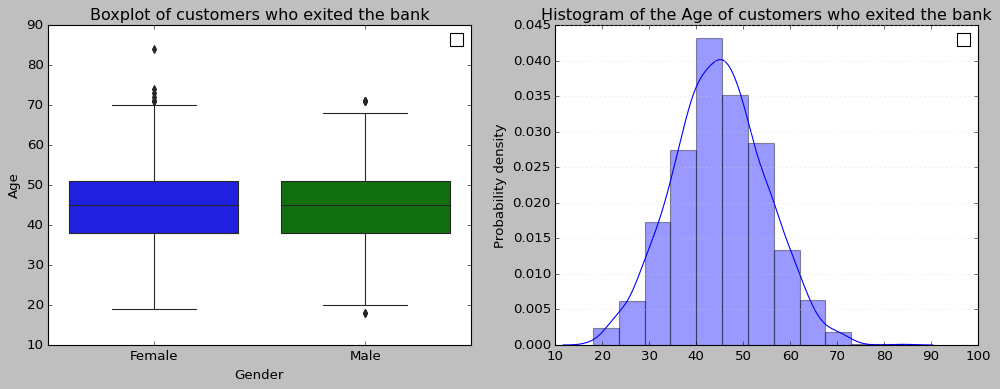

In [ ]:
heights = yes_exited[['Age']]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Boxplot of customers who exited the bank')
sns.boxplot(yes_exited['Gender'],yes_exited['Age'])
plt.legend()

plt.subplot(1,2,2)
plt.title("Histogram of the Age of customers who exited the bank")
sns.distplot(heights,bins='sturges')
plt.ylabel('Probability density')
plt.legend()
plt.grid(which='major',axis='y',color='lightgrey')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


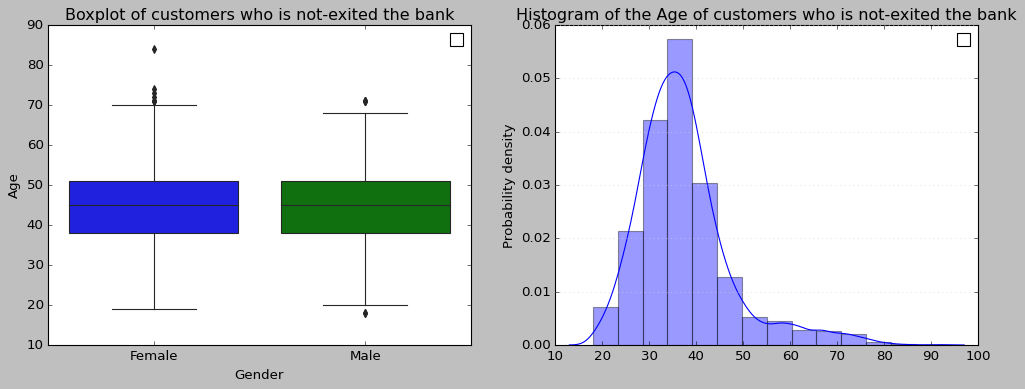

In [ ]:
No_exited = group_by_exited.get_group(0)
heights = No_exited[['Age']]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Boxplot of customers who is not-exited the bank')
sns.boxplot(yes_exited['Gender'],yes_exited['Age'])
plt.legend()

plt.subplot(1,2,2)
plt.title("Histogram of the Age of customers who is not-exited the bank")
sns.distplot(heights,bins='sturges')
plt.ylabel('Probability density')
plt.legend()
plt.grid(which='major',axis='y',color='lightgrey')
plt.show()


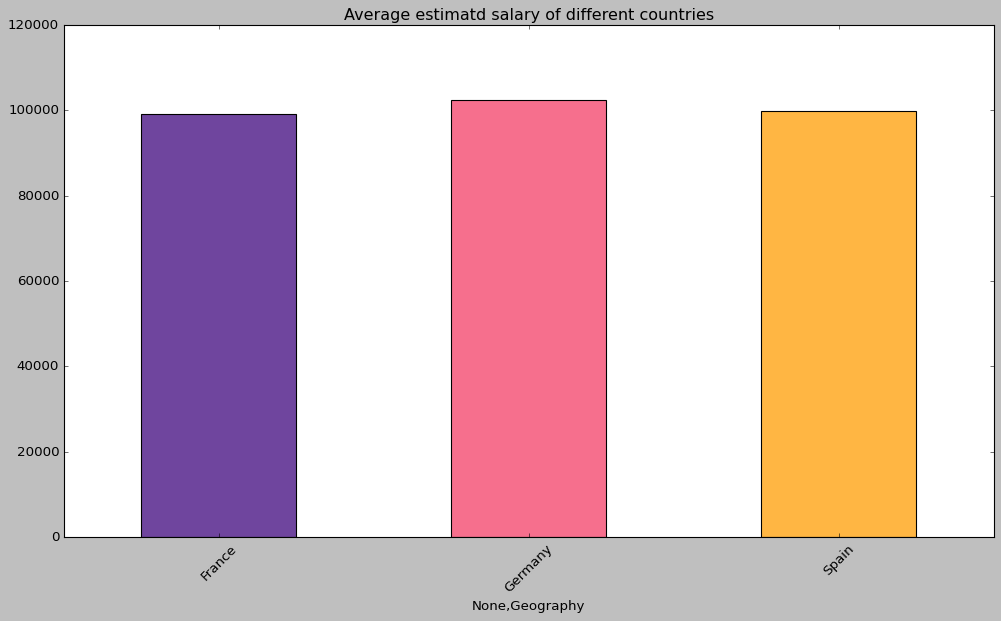

In [ ]:
dfv2 =df.groupby(['Geography'])['EstimatedSalary'].agg(['median'])
dfv2 = dfv2.unstack()
dfv2.plot(kind= 'bar',figsize=(15,8),title='Average estimatd salary of different countries',color = ['#6F459E','#F66F8D','#FFB643'])
plt.xticks(ticks=np.arange(3),labels=list(df['Geography'].value_counts().keys()),rotation=45)
plt.show()

In [ ]:
dfv2

        Geography
median  France        99132.31
        Germany      102397.22
        Spain         99984.86
dtype: float64

# **Deep learning Model**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BSE - Deep learning/Churn_Modelling.csv')

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values # last column values

In [ ]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


# **Encoding Categorical data**
Label Encoding the 'Gender' column

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:,2])

In [ ]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the 'Geography' column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# **Feature Scaling**

In [ ]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

## **Part 2 - Building the ANN**

**Initializing the ANN**

In [ ]:
# we are creating the object of the model ann
ann = tf.keras.models.Sequential()

**Adding the input layer and the first hidden layer**

In [ ]:
# creating
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the Second hidden layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the output layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Part 3 - Traning the ANN**

**compiling the ANN**

In [ ]:
# adam is an  optimization algorithm extension of stochastic gredient decent to update network weight during training. this optimizer widely used
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# gradient = error
#descent = drecreasing
#Cross entropy loss is a metric used to measure how well a classification model in machine learning performs. The loss (or error) is measured as
# a number between 0 and 1, with 0 being a perfect model. The goal is generally to get your model as close to 0 as possible

**Training the ANN on the Training set**

In [ ]:
ann.fit(x_train, y_train, batch_size= 32 , epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 5ms/step - loss: 0.6049 - accuracy: 0.7281
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4939 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4637 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4480 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4391 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4339 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4304 - accuracy: 0.7961
Epoch 8/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4270 - accuracy: 0.7968
Epoch 9/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4235 - accuracy: 0.7994
Epoch 10/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4181 - accura

In [ ]:
#epochs can be 1 or infinite
#batch size more then equal to 1 or less then equal to the number of sample in the training dataset

# **Part 4 - Making the prediction and evaluating the model**

**Predicting the result of a single observation**

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geograpphy: France

Credit Score: 600 

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

**So Should we say goodbye to that customer?**

In [ ]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))

1/1 [==============================] - 0s 126ms/step


array([[0.04149418]], dtype=float32)

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 20ms/step
[[False]]


**Therefore, our ANN Model predicts that this customer stay in the bank!**

**Important note 1:** Notice the values of the features were all input ina double pair of square brackets. That's because the "Predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of sequare brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1,0,0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features x, "France" was encoded as "1,0,0" And be careful to inculde these values in the first three columns, because the dummy variable are always created in the first columns.


# **Predicting the Test set results**

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# **Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1519   76]
 [ 202  203]]


0.861